<a href="https://colab.research.google.com/github/serg-kas/NN-archive/blob/main/%D0%90%D0%BF%D1%80%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_2020_Light_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_14_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Импорт библиотек#

In [ ]:

from tensorflow.keras.datasets import mnist # библиотека с базой Mnist
from tensorflow.keras.models import Sequential # модель
from tensorflow.keras.layers import Dense # слой
from tensorflow.keras.optimizers import Adam # оптимизатор
from tensorflow.keras import utils # утитилита to_categorical
from tensorflow.keras.preprocessing import image # из массива в картинку

from google.colab import files #работа с файлами в ноутбуке

import numpy as np # numpy

# далее все для графиков
from mpl_toolkits.mplot3d import Axes3D 
from PIL import Image
import pylab 
import matplotlib.pyplot as plt 
%matplotlib inline

#LIGHT#
**Вариант 1**

Перепишите ноутбук по распознаванию рукописных цифр, восстановив следующие операции:

1. Импорт библиотек.
2. Загрузка базы mnist.
3. Нормирование и преобразование x_train и y_train.
4. Создание нейронной сети.
5. Обучение нейронной сети.

Можно смотреть в ноутбук с занятия, но код необходимо писать самостоятельно.



In [ ]:
# Вариант Light 1

# загружаем Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(60000,)
7


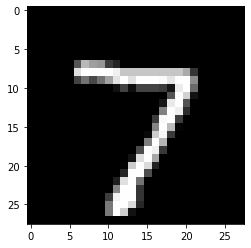

In [ ]:
# Посмотрим данные
print(x_train_org.shape)
print(y_train_org.shape)

#print(x_train_org[0])
print(y_test_org[0])
n = 0
plt.imshow(Image.fromarray(x_test_org[n]).convert('RGB'))
plt.show()

In [ ]:
#Каждый символ из матрицы 28х28 перестроим в вектор 784х1
x_train = x_train_org.reshape(60000,784)
x_test = x_test_org.reshape(10000, 784)

print('Было', x_train_org.shape, 'Стало',  x_train.shape)
print('Было', x_test_org.shape, 'Стало',  x_test.shape)

Было (60000, 28, 28) Стало (60000, 784)
Было (10000, 28, 28) Стало (10000, 784)


In [ ]:
#Нормализуем входные данные 

#меняем тип на float
x_train = x_train.astype('float32')
#поделив на 255 получим данные в диапазоне от 0 до 1
x_train = x_train / 255 
#меняем тип на float
x_test = x_test.astype('float32')
#поделив на 255 получим данные в диапазоне от 0 до 1
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [ ]:
# one_hot_encoding для данных=результатов
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

print('Было', y_train_org.shape, 'Стало',  y_train.shape)
print('Было', y_test_org.shape, 'Стало',  y_test.shape)

Было (60000,) Стало (60000, 10)
Было (10000,) Стало (10000, 10)


In [ ]:
#как теперь выглядят данные (примеры)
for i in range(0,5): print(y_train[i], '=', y_train_org[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] = 5
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] = 0
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] = 4
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] = 1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] = 9


In [ ]:
#Создаем сеть
model = Sequential()
#полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation="relu")) 
#полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) 
#полносвязный слой на 10 нейронов с softmax-активацией
model.add(Dense(10, activation="softmax")) 

In [ ]:
# Компиляция
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 
# Структура модели
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Обучение нейронной сети методом fit
#batch_size - сколько примеров обрабатывать для последующей коррекции весов
#epochs - сколько раз проводить обучение на всей выборке 
#verbose - 1 означает визуализировать 

model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)



Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2062 - accuracy: 0.9381
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0756 - accuracy: 0.9766
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0483 - accuracy: 0.9845
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0329 - accuracy: 0.9893
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0287 - accuracy: 0.9906
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0221 - accuracy: 0.9927
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0175 - accuracy: 0.9940
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0154 - accuracy: 0.9948
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0158 - accuracy: 0.9945
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0107 - accuracy: 0.9964

In [ ]:
#Сохраним веса
model.save_weights('model.h5')
#model.load_weights('model.h5')

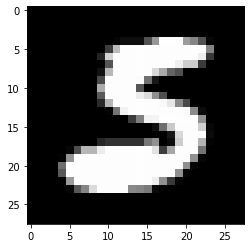

In [ ]:
#Распознавание рукописных цифр
n_rec = 7777
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

In [ ]:
# Формируем данные для распознавания
x = x_test[n_rec]

x = np.expand_dims(x, axis=0) #вектор переделали в массив
print(x.shape)

(1, 784)


In [ ]:
#и распознаем
prediction = model.predict(x)

#print(type(prediction))
print(prediction) #результат как массив

prediction = np.argmax(prediction)
print('Распознали:', prediction) #результат как цифра

print('Правильный ответ:', y_test_org[n_rec]) 

[[1.14742157e-20 4.86265894e-14 1.82501996e-19 5.85148907e-09
  1.01241826e-20 1.00000000e+00 2.09355443e-18 1.34996960e-17
  2.60188451e-11 1.71764599e-11]]
Распознали: 5
Правильный ответ: 5


#LIGHT#
**Вариант 2**

Проведите серию экспериментов по перебору гиперпараметров нейронной сети, созданной на занятии.

1. Поменяйте количество нейронов в сети, используя следующие значения:
* один слой 10 нейронов
* один слой 100 нейронов
* один слой 5000 нейронов

2. Поменяйте активационную функцию в скрытых слоях с relu на linear.
3. Поменяйте размеры batch_size:
* 1
* 10
* 100
* Вся база (60000)

4. Запишите в таблицу получившиеся точности.
5. Напишите выводы по результатам проведенных тестов.

In [ ]:
# Вариант Light 2

#Создаем сеть на слое из 10 нейронов
model_10 = Sequential()
#полносвязный слой на 10 нейронов с relu-активацией
model_10.add(Dense(10, input_dim=784, activation="relu")) 
#полносвязный слой на 10 нейронов с softmax-активацией
model_10.add(Dense(10, activation="softmax")) 

In [ ]:
# Компиляция
model_10.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 
# Структура модели
print(model_10.summary()) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Учим так же как в варианте 1
model_10.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.8335 - accuracy: 0.7579
Epoch 2/15
469/469 [==============================] - 2s 3ms/step - loss: 0.3776 - accuracy: 0.8925
Epoch 3/15
469/469 [==============================] - 2s 3ms/step - loss: 0.3095 - accuracy: 0.9126
Epoch 4/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2835 - accuracy: 0.9201
Epoch 5/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2683 - accuracy: 0.9251
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2562 - accuracy: 0.9283
Epoch 7/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2483 - accuracy: 0.9300
Epoch 8/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2402 - accuracy: 0.9330
Epoch 9/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2343 - accuracy: 0.9346
Epoch 10/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2283 - accuracy: 0.9355

In [ ]:

#Создаем сеть на слое из 100 нейронов
model_100 = Sequential()
#полносвязный слой на 100 нейронов с relu-активацией
model_100.add(Dense(100, input_dim=784, activation="relu")) 
#полносвязный слой на 10 нейронов с softmax-активацией
model_100.add(Dense(10, activation="softmax")) 

In [ ]:
# Компиляция
model_100.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 
# Структура модели
print(model_100.summary()) 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Учим так же как в варианте 1
model_100.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.3740 - accuracy: 0.8963
Epoch 2/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1701 - accuracy: 0.9512
Epoch 3/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1241 - accuracy: 0.9643
Epoch 4/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0989 - accuracy: 0.9715
Epoch 5/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0818 - accuracy: 0.9767
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0685 - accuracy: 0.9808
Epoch 7/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0586 - accuracy: 0.9832
Epoch 8/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0508 - accuracy: 0.9855
Epoch 9/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0446 - accuracy: 0.9868
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0383 - accuracy: 0.9891

In [ ]:


#Создаем сеть на слое из 5000 нейронов
model_5000 = Sequential()
#полносвязный слой на 5000 нейронов с relu-активацией
model_5000.add(Dense(5000, input_dim=784, activation="relu")) 
#полносвязный слой на 10 нейронов с softmax-активацией
model_5000.add(Dense(10, activation="softmax")) 

In [ ]:
# Компиляция
model_5000.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 
# Структура модели
print(model_5000.summary()) 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 5000)              3925000   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                50010     
Total params: 3,975,010
Trainable params: 3,975,010
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Учим так же как в варианте 1
model_5000.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1937 - accuracy: 0.9418
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0730 - accuracy: 0.9774
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0453 - accuracy: 0.9858
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0305 - accuracy: 0.9900
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0217 - accuracy: 0.9928
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0175 - accuracy: 0.9942
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0141 - accuracy: 0.9951
Epoch 8/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 9/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0133 - accuracy: 0.9955
Epoch 10/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0106 - accuracy: 0.9965

Лучше всего научилась сеть из одного 5000 нейронного слоя. На втором месте сеть 800+400 из Варианта 1. На третьем - сеть из 100 нейронов и на последнем  - из 10.
Первые три сети имеют точность выше 99% и все получились работоспособны.
Последняя - 10 нейронная не выучилась более чем на 93%

In [ ]:
#Меняем активационную функцию с relu на linear

#Создаем сеть
model_lin = Sequential()
#полносвязный слой на 800 нейронов 
model_lin.add(Dense(800, input_dim=784, activation="linear")) 
#полносвязный слой на 400 нейронов 
model_lin.add(Dense(400, activation="linear")) 
#полносвязный слой на 10 нейронов с softmax-активацией
model_lin.add(Dense(10, activation="softmax")) 

In [ ]:
# Компиляция
model_lin.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 
# Структура модели
print(model_lin.summary()) 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_10 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Учим так же как в варианте 1
model_lin.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3959 - accuracy: 0.8866
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3280 - accuracy: 0.9070
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3132 - accuracy: 0.9114
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3018 - accuracy: 0.9150
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2937 - accuracy: 0.9173
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2914 - accuracy: 0.9173
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2886 - accuracy: 0.9175
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2827 - accuracy: 0.9206
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2803 - accuracy: 0.9211
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2783 - accuracy: 0.9218

Не выучились выше 92 процентов

In [ ]:
#Поменяйте размеры batch_size: 1 10 100 Вся база (60000)

#Повторим сеть как в варианте 1
model_2 = Sequential()
#полносвязный слой на 800 нейронов с relu-активацией
model_2.add(Dense(800, input_dim=784, activation="relu")) 
#полносвязный слой на 400 нейронов с relu-активацией
model_2.add(Dense(400, activation="relu")) 
#полносвязный слой на 10 нейронов с softmax-активацией
model_2.add(Dense(10, activation="softmax")) 

In [ ]:
# Компиляция
model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 
# Структура модели
print(model_2.summary()) 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_13 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Учим batch=1
model_2.fit(x_train, y_train, batch_size=1, epochs=15, verbose=1)

Epoch 1/15
60000/60000 [==============================] - 116s 2ms/step - loss: 0.2828 - accuracy: 0.9263
Epoch 2/15
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1942 - accuracy: 0.9570
Epoch 3/15
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1706 - accuracy: 0.9639
Epoch 4/15
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1587 - accuracy: 0.9678
Epoch 5/15
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1487 - accuracy: 0.9703
Epoch 6/15
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1398 - accuracy: 0.9734
Epoch 7/15
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1323 - accuracy: 0.9750
Epoch 8/15
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1357 - accuracy: 0.9763
Epoch 9/15
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1246 - accuracy: 0.9772
Epoch 10/15
60000/60000 [=====================

In [ ]:
#Повторим сеть как в варианте 1
model_2 = Sequential()
#полносвязный слой на 800 нейронов с relu-активацией
model_2.add(Dense(800, input_dim=784, activation="relu")) 
#полносвязный слой на 400 нейронов с relu-активацией
model_2.add(Dense(400, activation="relu")) 
#полносвязный слой на 10 нейронов с softmax-активацией
model_2.add(Dense(10, activation="softmax")) 

# Компиляция
model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 

#Учим batch=10
model_2.fit(x_train, y_train, batch_size=10, epochs=15, verbose=1)

Epoch 1/15
6000/6000 [==============================] - 21s 4ms/step - loss: 0.1892 - accuracy: 0.9430
Epoch 2/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0932 - accuracy: 0.9726
Epoch 3/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0673 - accuracy: 0.9798
Epoch 4/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0538 - accuracy: 0.9839
Epoch 5/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0468 - accuracy: 0.9865
Epoch 6/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0420 - accuracy: 0.9880
Epoch 7/15
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0373 - accuracy: 0.9898
Epoch 8/15
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0346 - accuracy: 0.9904
Epoch 9/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0343 - accuracy: 0.9911
Epoch 10/15
6000/6000 [==============================] - 21s 4ms/step - l

In [ ]:
#Повторим сеть как в варианте 1
model_2 = Sequential()
#полносвязный слой на 800 нейронов с relu-активацией
model_2.add(Dense(800, input_dim=784, activation="relu")) 
#полносвязный слой на 400 нейронов с relu-активацией
model_2.add(Dense(400, activation="relu")) 
#полносвязный слой на 10 нейронов с softmax-активацией
model_2.add(Dense(10, activation="softmax")) 

# Компиляция
model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 

#Учим batch=100
model_2.fit(x_train, y_train, batch_size=100, epochs=15, verbose=1)

Epoch 1/15
600/600 [==============================] - 3s 4ms/step - loss: 0.1986 - accuracy: 0.9397
Epoch 2/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0746 - accuracy: 0.9767
Epoch 3/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0490 - accuracy: 0.9838
Epoch 4/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0344 - accuracy: 0.9889
Epoch 5/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0293 - accuracy: 0.9901
Epoch 6/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0235 - accuracy: 0.9923
Epoch 7/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0178 - accuracy: 0.9941
Epoch 8/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0194 - accuracy: 0.9935
Epoch 9/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0168 - accuracy: 0.9944
Epoch 10/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0110 - accuracy: 0.9963

In [ ]:
#Повторим сеть как в варианте 1
model_2 = Sequential()
#полносвязный слой на 800 нейронов с relu-активацией
model_2.add(Dense(800, input_dim=784, activation="relu")) 
#полносвязный слой на 400 нейронов с relu-активацией
model_2.add(Dense(400, activation="relu")) 
#полносвязный слой на 10 нейронов с softmax-активацией
model_2.add(Dense(10, activation="softmax")) 

# Компиляция
model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 

#Учим batch=60000
model_2.fit(x_train, y_train, batch_size=60000, epochs=15, verbose=1)

Epoch 1/15
1/1 [==============================] - 0s 2ms/step - loss: 2.3213 - accuracy: 0.1212
Epoch 2/15
1/1 [==============================] - 0s 170ms/step - loss: 1.9044 - accuracy: 0.5726
Epoch 3/15
1/1 [==============================] - 0s 155ms/step - loss: 1.5583 - accuracy: 0.7201
Epoch 4/15
1/1 [==============================] - 0s 146ms/step - loss: 1.2336 - accuracy: 0.7923
Epoch 5/15
1/1 [==============================] - 0s 152ms/step - loss: 0.9636 - accuracy: 0.8090
Epoch 6/15
1/1 [==============================] - 0s 151ms/step - loss: 0.7589 - accuracy: 0.8304
Epoch 7/15
1/1 [==============================] - 0s 138ms/step - loss: 0.6177 - accuracy: 0.8483
Epoch 8/15
1/1 [==============================] - 0s 147ms/step - loss: 0.5236 - accuracy: 0.8594
Epoch 9/15
1/1 [==============================] - 0s 149ms/step - loss: 0.4627 - accuracy: 0.8664
Epoch 10/15
1/1 [==============================] - 0s 152ms/step - loss: 0.4194 - accuracy: 0.8785
Epoch 11/15
1/1 [====


[Таблица с результатами обучения](https://docs.google.com/spreadsheets/d/1LqBEzxrq8F0fzsIeJkCBf6uHE0225lnryOnygQV1fHM/edit?usp=sharing)

In [ ]:
#Распознаем туже цифру, что в Варианте 1
prediction_2 = model_2.predict(x)

print(prediction_2) #результат как массив

prediction_2 = np.argmax(prediction_2)
print('Распознали:', prediction_2) #результат как цифра

print('Правильный ответ:', y_test_org[n_rec]) 

[[8.9184986e-03 2.3669557e-08 9.3189152e-03 2.7832741e-02 6.0461150e-11
  9.5037979e-01 1.8754966e-03 9.6290698e-10 1.6746164e-03 2.8617435e-09]]
Распознали: 5
Правильный ответ: 5


#PRO#

Распознайте рукописную цифру, созданную вами с помощью графического редактора (например, Paint).

Последовательность шагов:
1. В графическом редакторе рисуем произвольную цифру.
2. Сохраняем документ и загружаем его в Collaboratory.
3. С помощью функции image.load_img(‘2.png’, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
4.  С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
5. Выполняем инверсию цветов, нормирование и решейп массива.
6. Выполняем распознавание собственной рукописной цифры.

Реализуйте тот же алгоритм для написанной на листе от руки цифры (для этого необходимо сделать дополнительную предобработку изображения).


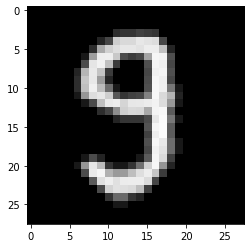

In [ ]:
#Файл с рукописной цифрой 9.png создал 28х28 пикселов и сразу белым на черном фоне 

x_9 = image.load_img('9.png', target_size=(28,28), color_mode='grayscale')
#print(type(x))

plt.imshow(x_9.convert('RGB'))
plt.show()

In [ ]:
#Переделываем в массив и делаем решейп

x_9 = image.img_to_array(x_9)
print(x_9.shape)

x_9 = x_9.reshape(1,784)
print(x_9.shape)

(28, 28, 1)
(1, 784)


In [ ]:
#и распознаем
prediction_9 = model.predict(x_9)

#print(type(prediction))
print(prediction_9) #результат как массив

prediction_9 = np.argmax(prediction_9)
print('Распознали:', prediction_9) #результат как цифра



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Распознали: 9


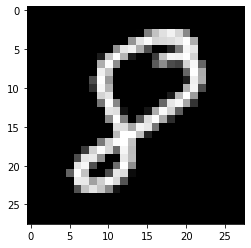

In [ ]:
#Повторим тоже самое с фото рукописной  цифры
#Файл с рукописной цифрой 8.png сделан из фото.

x_8 = image.load_img('8.png', target_size=(28,28), color_mode='grayscale')
#print(type(x))

plt.imshow(x_8.convert('RGB'))
plt.show()

In [ ]:
#Переделываем в массив и делаем решейп

x_8 = image.img_to_array(x_8)
print(x_8.shape)

x_8 = x_8.reshape(1,784)
print(x_8.shape)

(28, 28, 1)
(1, 784)


In [ ]:
#и распознаем
prediction_8 = model.predict(x_8)

#print(type(prediction))
print(prediction_8) #результат как массив

prediction_8 = np.argmax(prediction_8)
print('Распознали:', prediction_8) #результат как цифра

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Распознали: 8


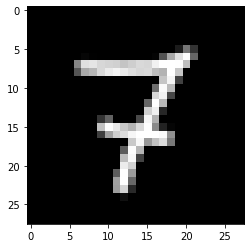

In [ ]:
#Посмотрим цифру 7. Распознает ли 7 с черточкой.
#Файл с рукописной цифрой 7.png сделан из фото.

x_7 = image.load_img('7.png', target_size=(28,28), color_mode='grayscale')
#print(type(x))

plt.imshow(x_7.convert('RGB'))
plt.show()

In [ ]:
#Переделываем в массив и делаем решейп

x_7 = image.img_to_array(x_7)
print(x_7.shape)

x_7 = x_7.reshape(1,784)
print(x_7.shape)

(28, 28, 1)
(1, 784)


In [ ]:
#и распознаем
prediction_7 = model.predict(x_7)

#print(type(prediction))
print(prediction_7) #результат как массив

prediction_7 = np.argmax(prediction_7)
print('Распознали:', prediction_7) #результат как цифра

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Распознали: 7
